In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [5]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [7]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
data.drop('month',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [12]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-13-341ad51d7b4d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-13-341ad51d7b4d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-13-341ad51d7b4d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

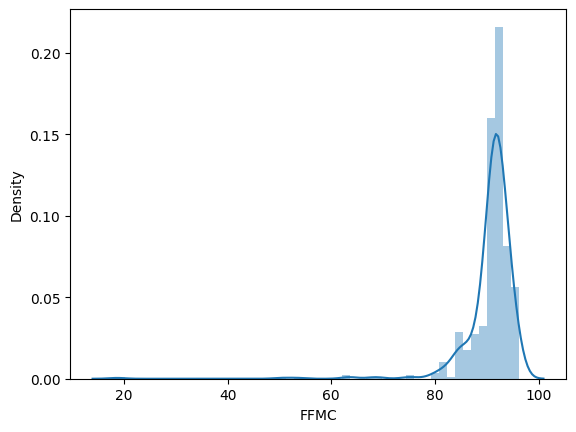

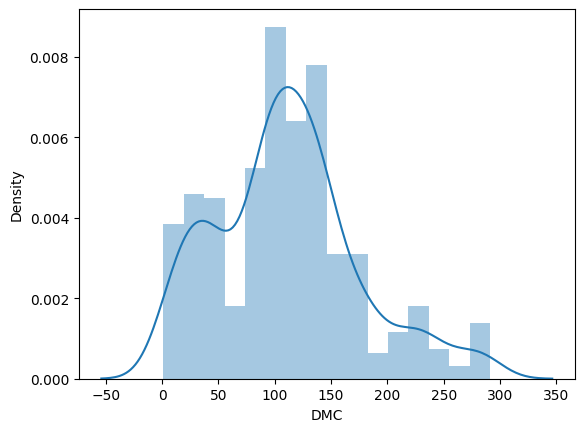

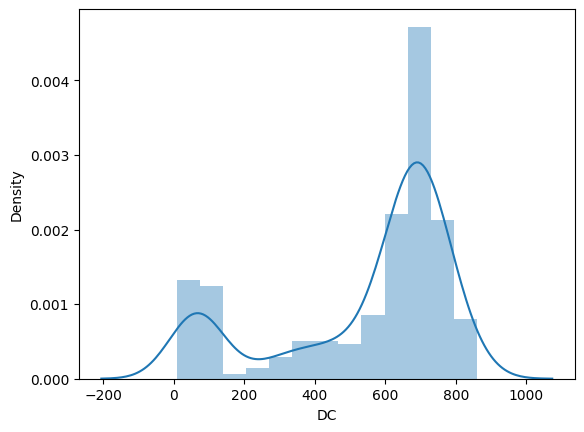

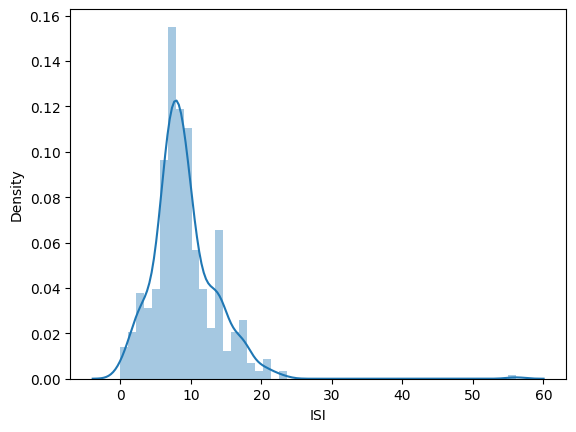

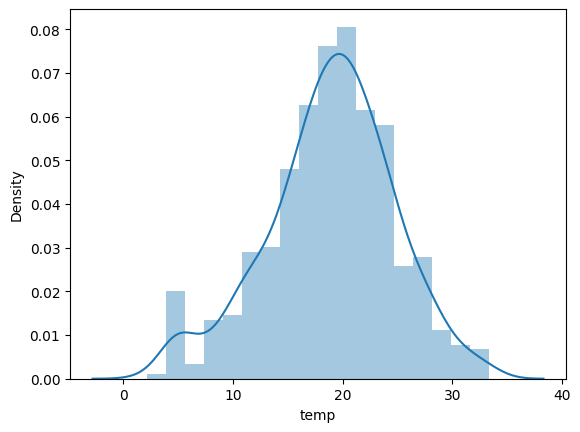

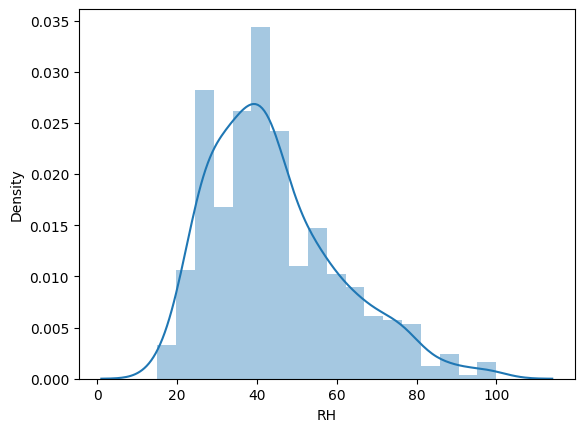

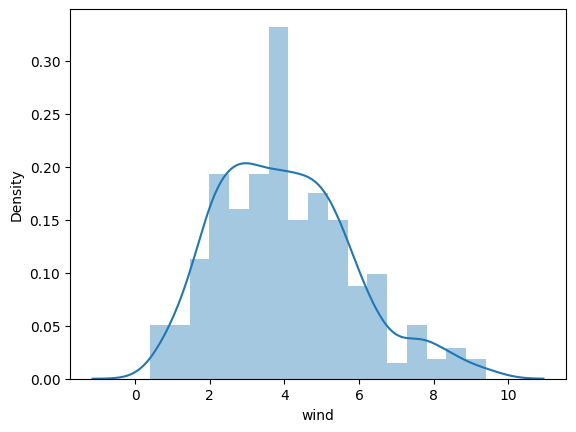

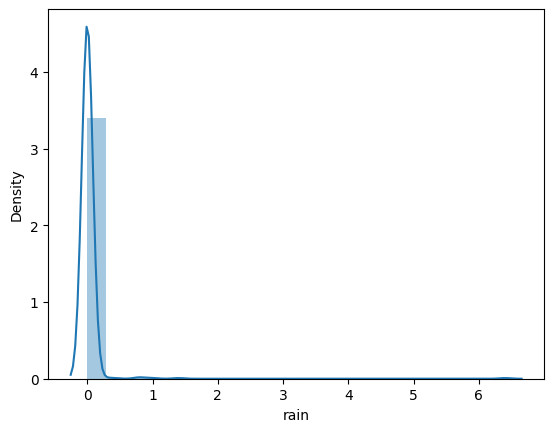

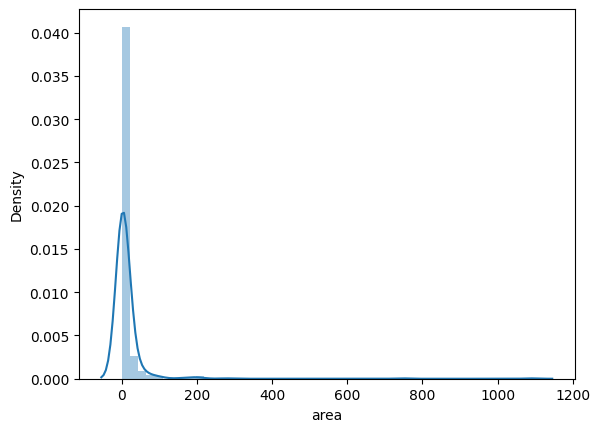

In [13]:
columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
for i in columns:
  plt.figure()
  sns.distplot(data[i])

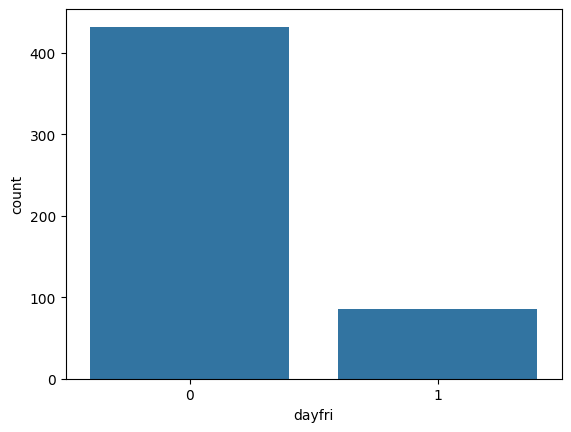

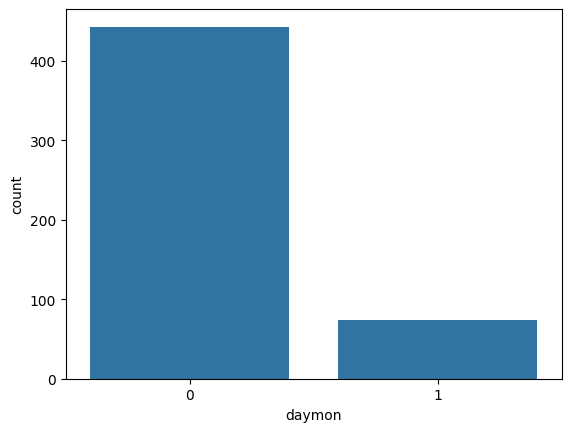

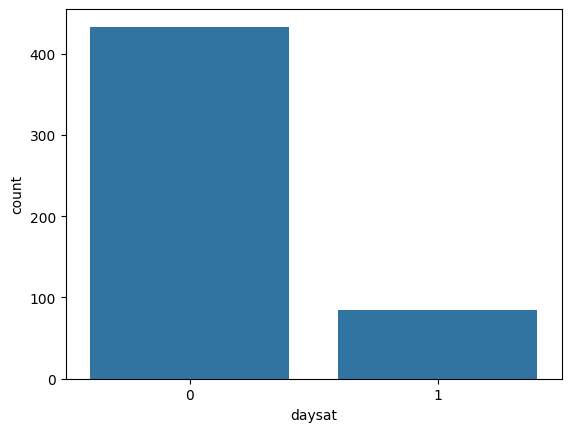

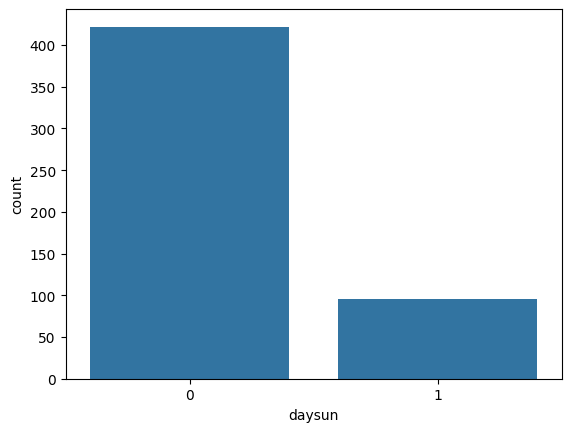

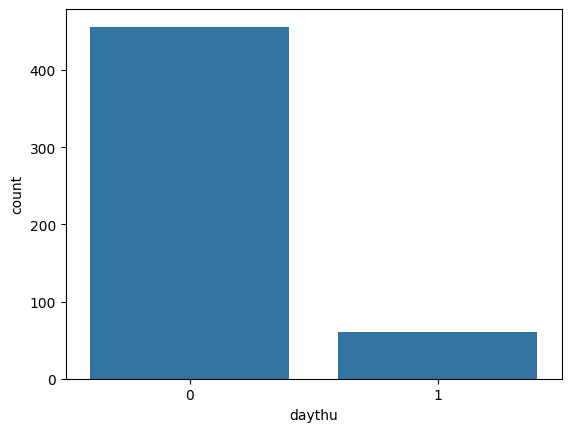

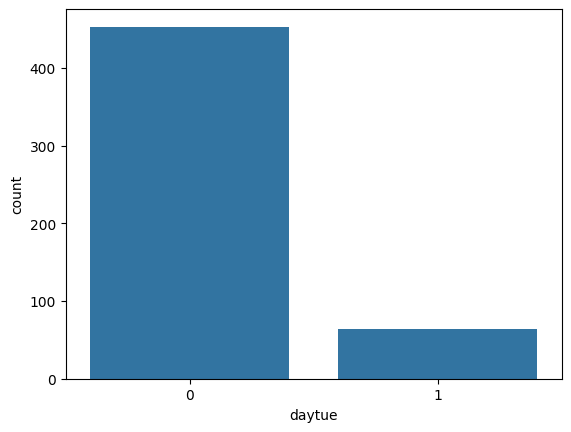

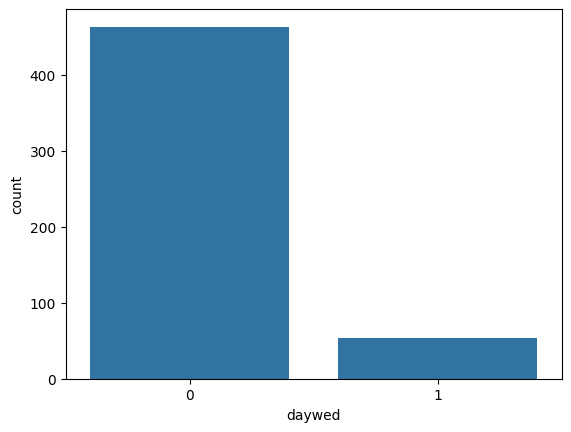

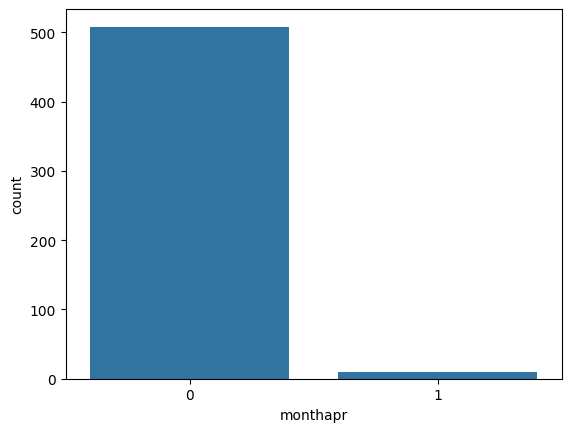

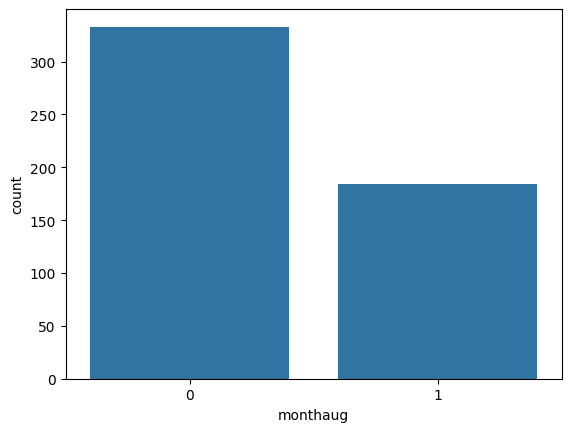

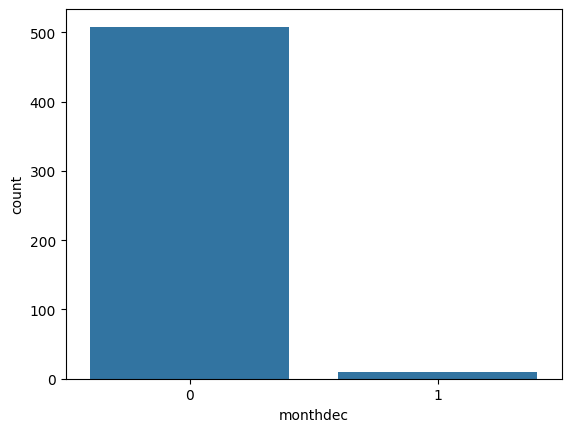

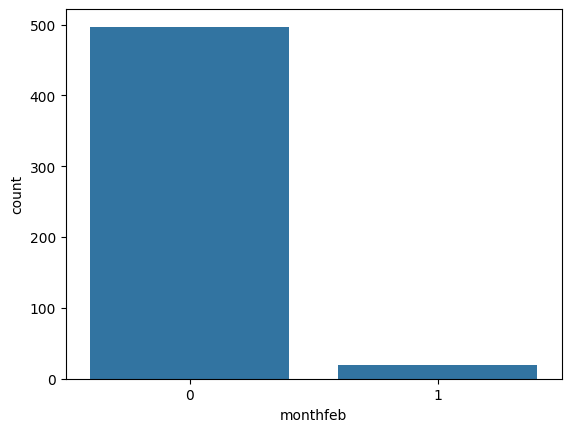

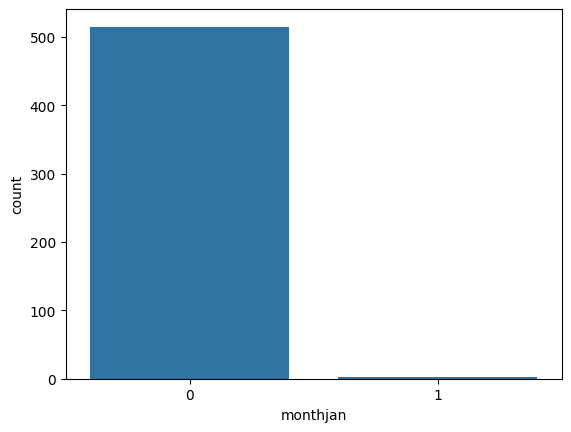

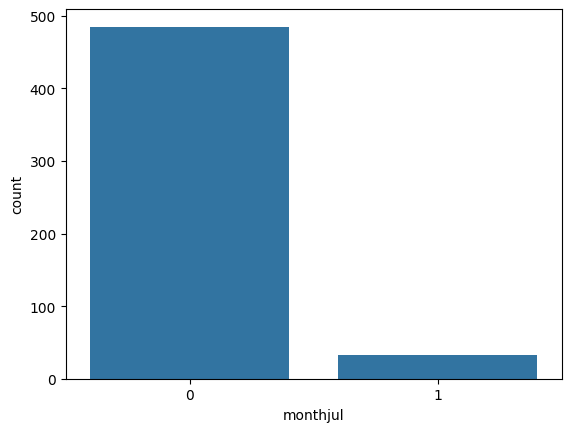

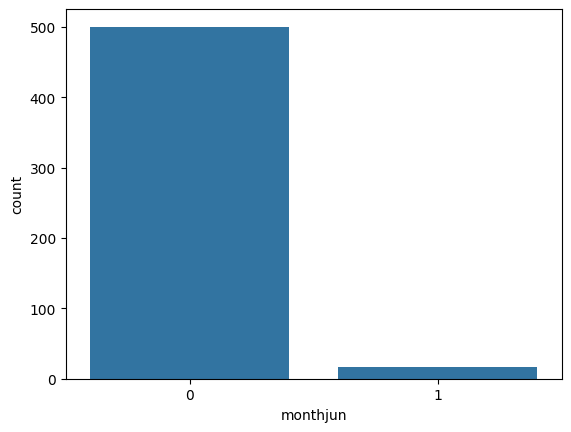

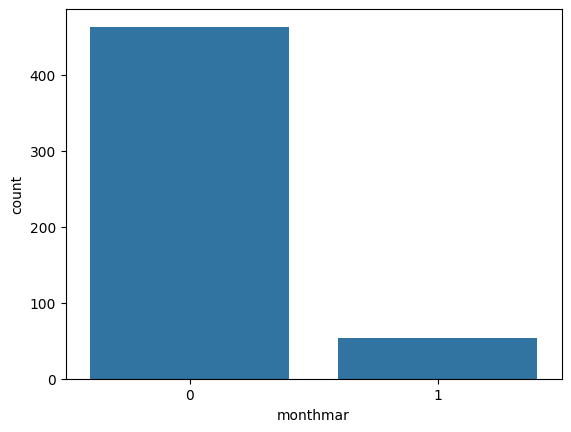

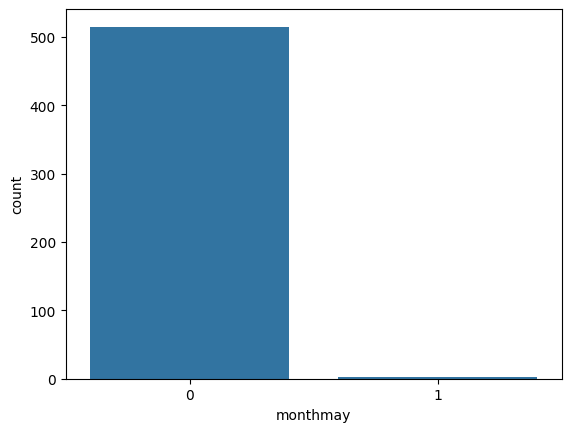

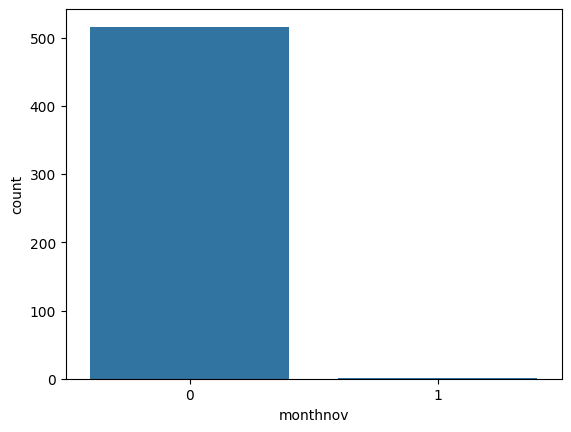

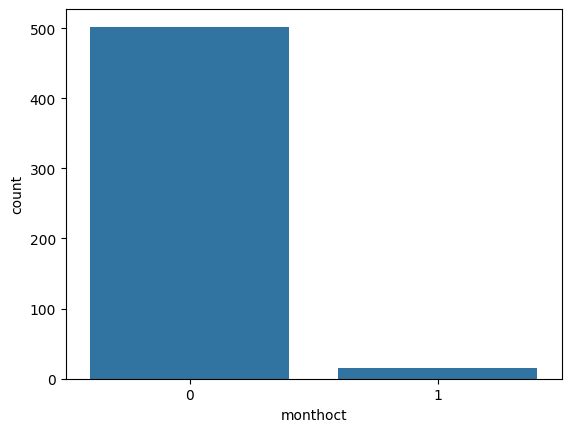

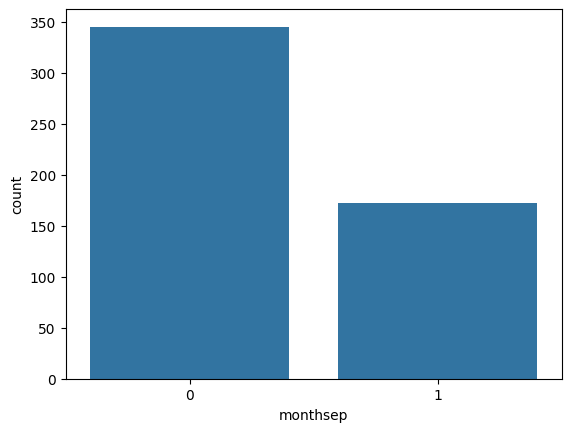

In [14]:
columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul','monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
for i in columns:
  plt.figure()
  sns.countplot(x=data[i])


In [15]:
le=LabelEncoder()
data['size_category']=le.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
corr=data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


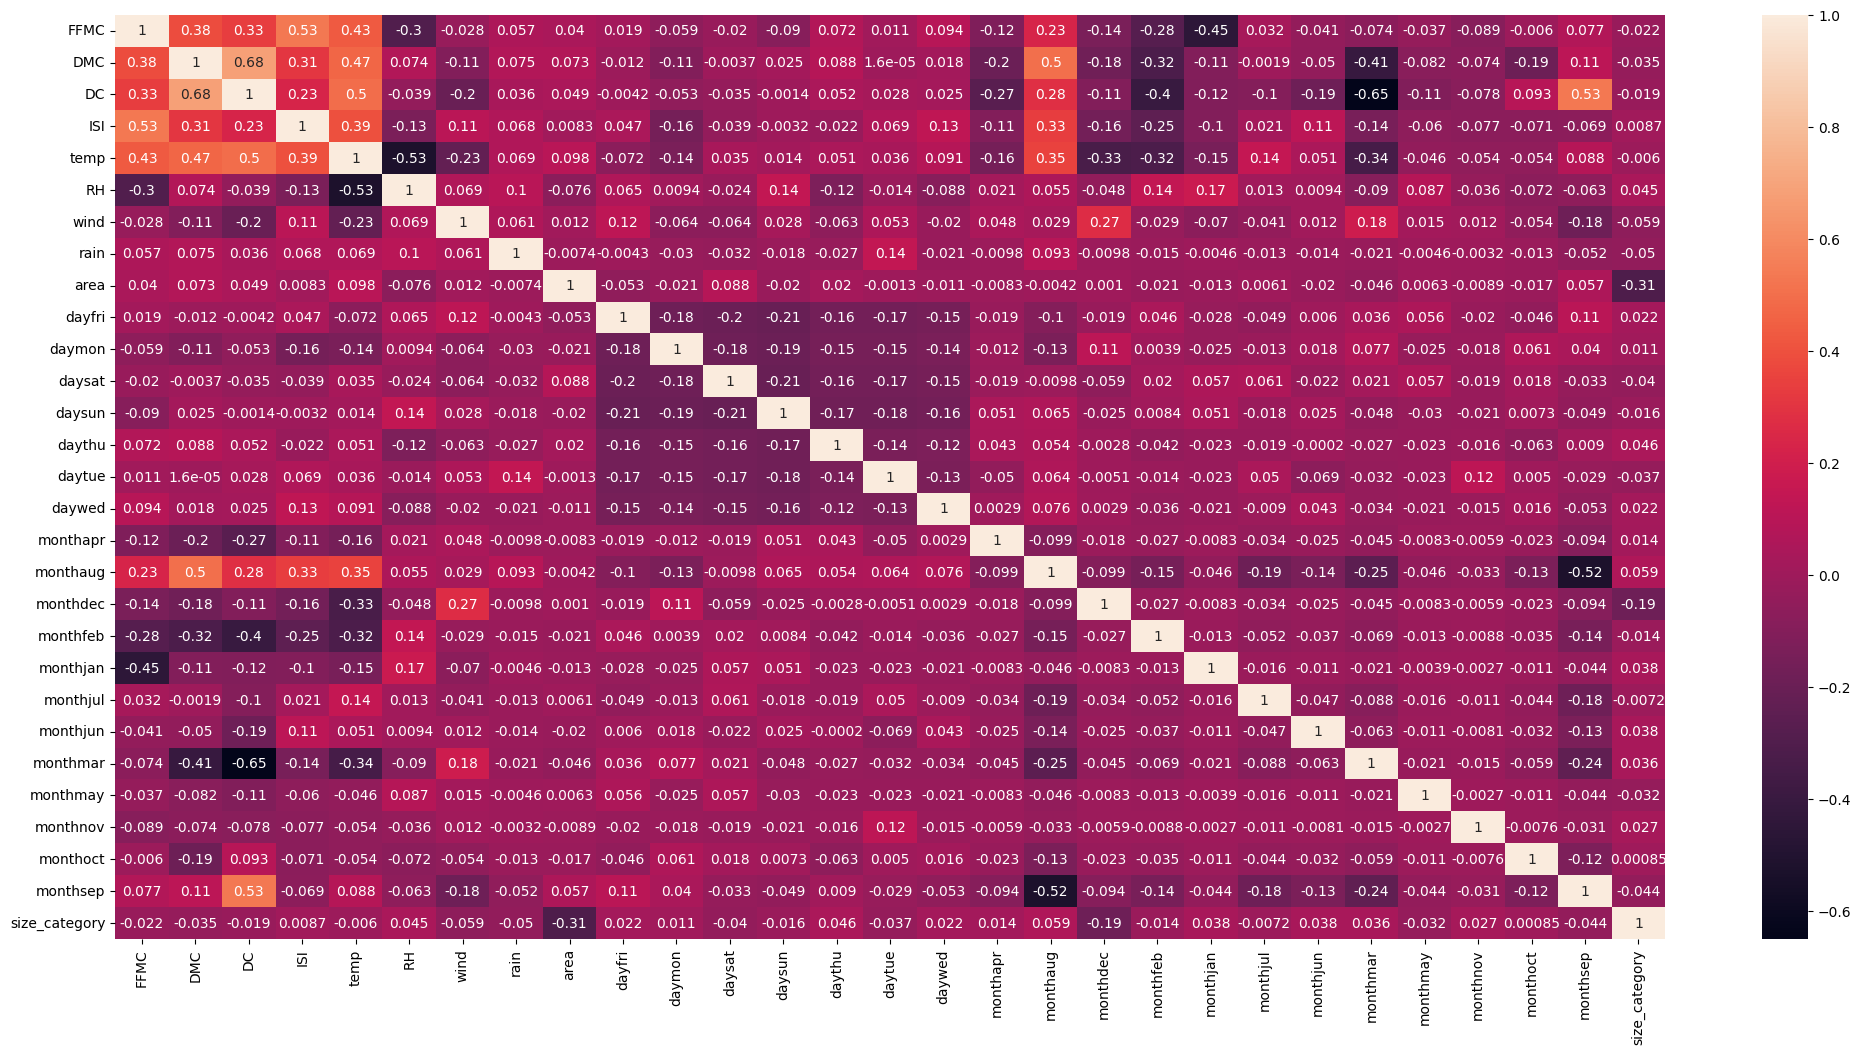

In [17]:
plt.figure(figsize=(25,12))
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


x_train.shape,x_test.shape


y_train.shape,y_test.shape

((413,), (104,))

In [19]:
from imblearn.over_sampling import SMOTE
model=SMOTE(random_state=20)
x_train_st,y_train_st=model.fit_resample(x_train,np.array(y_train).ravel())
x_train_st,y_train_st

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    88.800000  147.300000  614.500000   9.000000  14.400000  66  5.400000   
 1    92.600000   46.500000  691.800000   8.800000  15.400000  35  0.900000   
 2    89.300000   51.300000  102.200000   9.600000  11.400000  99  1.800000   
 3    88.300000  150.300000  309.900000   6.800000  13.400000  79  3.600000   
 4    92.100000   99.000000  745.300000   9.600000  20.800000  35  4.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 607  91.150884  128.655050  690.769275   7.160943  19.433713  38  2.381061   
 608  91.454178  131.810383  696.806081   8.362533  14.828102  57  5.766835   
 609  81.317715    8.598716   51.563414   2.617972   5.690629  54  5.353402   
 610  91.594770   38.430745   84.377813   8.789160  15.884564  28  4.710586   
 611  93.297214  141.170748  713.847764  13.867266  18.620198  48  3.581195   
 
      rain        area  dayfri  ...  monthdec  mon

In [20]:
x_train_st.shape,y_train_st.shape

((612, 28), (612,))

In [21]:
x_train=x_train_st.copy()
y_train=y_train_st.copy()

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train=scale.fit_transform(x_train)
X_train

array([[0.90451613, 0.50379049, 0.71138736, ..., 0.        , 0.        ,
        0.        ],
       [0.95354839, 0.15644383, 0.80204058, ..., 0.        , 1.        ,
        0.        ],
       [0.91096774, 0.17298415, 0.11058989, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.80797052, 0.02583982, 0.05120607, ..., 0.        , 0.        ,
        0.        ],
       [0.94057768, 0.12863799, 0.089689  , ..., 0.        , 0.        ,
        0.        ],
       [0.9625447 , 0.4826697 , 0.82789699, ..., 0.        , 0.        ,
        1.        ]])

In [23]:
X_test=scale.fit_transform(x_test)
X_test

array([[0.9235474 , 0.34388039, 0.48571088, ..., 0.        , 0.        ,
        0.        ],
       [0.62691131, 0.02399166, 0.02202905, ..., 0.        , 0.        ,
        0.        ],
       [0.89908257, 0.45514604, 0.81459871, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.90214067, 0.25347705, 0.5371517 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.60187761, 0.769588  , ..., 0.        , 0.        ,
        0.        ],
       [0.82874618, 0.16585535, 0.1010955 , ..., 0.        , 0.        ,
        0.        ]])

## Tuning Of HyperParameter :Batch size and Epochs

In [24]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [25]:
from sklearn.model_selection import GridSearchCV,KFold
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.821 total time=  14.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.878 total time=  23.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.836 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.877 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.918 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=10, epochs=100;, score=0.919 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=10, epochs=100;, score=0.919 total time=  22.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=10, epochs=100;, score=0.910 total time=  21.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=10, epochs=100;, score=0.926 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=10, epochs=100;, score=0.967 total time=  11.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=10, epochs=150;, score=0.935 total time=  15.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=10, epochs=150;, score=0.943 total time=  21.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=10, epochs=150;, score=0.934 total time=  15.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=10, epochs=150;, score=0.967 total time=  21.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=10, epochs=150;, score=0.967 total time=  14.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.813 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.780 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.730 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.844 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.918 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=20, epochs=100;, score=0.902 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=20, epochs=100;, score=0.902 total time=  12.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=20, epochs=100;, score=0.861 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=20, epochs=100;, score=0.910 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=20, epochs=100;, score=0.918 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=20, epochs=150;, score=0.927 total time=   9.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=20, epochs=150;, score=0.894 total time=   9.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=20, epochs=150;, score=0.893 total time=   9.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=20, epochs=150;, score=0.926 total time=  11.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=20, epochs=150;, score=0.967 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..........batch_size=30, epochs=50;, score=0.789 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..........batch_size=30, epochs=50;, score=0.789 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..........batch_size=30, epochs=50;, score=0.721 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..........batch_size=30, epochs=50;, score=0.844 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..........batch_size=30, epochs=50;, score=0.902 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=30, epochs=100;, score=0.854 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=30, epochs=100;, score=0.821 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=30, epochs=100;, score=0.836 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=30, epochs=100;, score=0.852 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=30, epochs=100;, score=0.918 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=30, epochs=150;, score=0.894 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=30, epochs=150;, score=0.902 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=30, epochs=150;, score=0.852 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=30, epochs=150;, score=0.918 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=30, epochs=150;, score=0.926 total time=   7.4s


In [26]:
print(result.best_score_,result.best_params_)

0.9493802479008396 {'batch_size': 10, 'epochs': 150}


In [27]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [28]:
model1=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,learning_rate=[0.01,0.001,0.1],
dropout_rate=[0.2,0.1,0.02])
param_grid=dict(learning_rate=[0.01,0.001,0.1],dropout_rate=[0.2,0.1,0.02])
result=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=5)
result1=result.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.837 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.878 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.852 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.844 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.918 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.854 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.862 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.844 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.844 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.918 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.829 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.870 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.836 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.869 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.918 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.854 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.821 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.861 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.852 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.926 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.886 total time=  12.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.870 total time=  11.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.852 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.910 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.918 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.862 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.837 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.787 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.869 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.918 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.870 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.837 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.811 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.852 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.918 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.894 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.837 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.852 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.844 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.918 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.886 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.878 total time=  11.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.852 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.893 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.918 total time=   6.1s


In [29]:
print(result1.best_params_,result.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8872850859656138


In [30]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [31]:
model1=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,learning_rate=[0.01,0.001,0.1],
dropout_rate=[0.2,0.1,0.02])
param_grid=dict(learning_rate=[0.01,0.001,0.1],dropout_rate=[0.2,0.1,0.02])
result=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=5)
result1=result.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.870 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.854 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.852 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.852 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.926 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.846 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.821 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.836 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.869 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.918 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.902 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.886 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.787 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.861 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.918 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.862 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.870 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.811 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.861 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.918 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.862 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.902 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.852 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.852 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.918 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.837 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.862 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.836 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.852 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.926 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.870 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.846 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.844 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.852 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.918 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.870 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.894 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.803 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.902 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.926 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.837 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.829 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.844 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.844 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.918 total time=   5.2s


In [32]:
print(result1.best_params_,result.best_score_)

{'dropout_rate': 0.02, 'learning_rate': 0.001} 0.8790750366520058


In [33]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [34]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
gsv1=GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=5)
result1=gsv1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=zero;, score=0.260 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=zero;, score=0.268 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=zero;, score=0.221 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=zero;, score=0.246 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=zero;, score=0.000 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=uniform;, score=0.870 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=uniform;, score=0.821 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=uniform;, score=0.836 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=uniform;, score=0.844 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=uniform;, score=0.918 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=normal;, score=0.846 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=normal;, score=0.878 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=normal;, score=0.836 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=normal;, score=0.869 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=normal;, score=0.918 total time=   8.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=zero;, score=0.260 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=zero;, score=0.268 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=zero;, score=0.221 total time=  11.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=zero;, score=0.246 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=zero;, score=0.000 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.894 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.894 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.885 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.910 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.943 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=normal;, score=0.886 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=normal;, score=0.911 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=normal;, score=0.885 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=normal;, score=0.885 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=normal;, score=0.959 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=zero;, score=0.260 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=zero;, score=0.268 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=zero;, score=0.221 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=zero;, score=0.246 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=zero;, score=0.000 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.780 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.732 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.697 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.779 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.000 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=normal;, score=0.780 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=normal;, score=0.715 total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=normal;, score=0.689 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=normal;, score=0.787 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=normal;, score=0.000 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=zero;, score=0.260 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=zero;, score=0.268 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=zero;, score=0.221 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=zero;, score=0.246 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=zero;, score=0.000 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=uniform;, score=0.886 total time=   8.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=uniform;, score=0.886 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=uniform;, score=0.893 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=uniform;, score=0.918 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=uniform;, score=0.943 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=normal;, score=0.878 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=normal;, score=0.886 total time=  11.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=normal;, score=0.869 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=normal;, score=0.902 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=normal;, score=0.967 total time=   5.1s


In [35]:
print(result1.best_params_,result1.best_score_)

{'activation_Function': 'linear', 'init': 'uniform'} 0.9052912168465947


In [36]:
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [37]:
model=KerasClassifier(build_fn=create_model,batch_size=30,epochs=10,verbose=0,neuron1=[12,10,9],neuron2=[8,6,4])
param_grid=dict(neuron1=[12,10,9],neuron2=[8,6,4])
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .............neuron1=12, neuron2=8;, score=0.496 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .............neuron1=12, neuron2=8;, score=0.496 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .............neuron1=12, neuron2=8;, score=0.402 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .............neuron1=12, neuron2=8;, score=0.246 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .............neuron1=12, neuron2=8;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .............neuron1=12, neuron2=6;, score=0.732 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .............neuron1=12, neuron2=6;, score=0.740 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .............neuron1=12, neuron2=6;, score=0.221 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .............neuron1=12, neuron2=6;, score=0.246 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .............neuron1=12, neuron2=6;, score=0.000 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .............neuron1=12, neuron2=4;, score=0.301 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .............neuron1=12, neuron2=4;, score=0.268 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .............neuron1=12, neuron2=4;, score=0.352 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .............neuron1=12, neuron2=4;, score=0.246 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .............neuron1=12, neuron2=4;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .............neuron1=10, neuron2=8;, score=0.382 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .............neuron1=10, neuron2=8;, score=0.602 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .............neuron1=10, neuron2=8;, score=0.287 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .............neuron1=10, neuron2=8;, score=0.246 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .............neuron1=10, neuron2=8;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .............neuron1=10, neuron2=6;, score=0.260 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .............neuron1=10, neuron2=6;, score=0.268 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .............neuron1=10, neuron2=6;, score=0.697 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .............neuron1=10, neuron2=6;, score=0.246 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .............neuron1=10, neuron2=6;, score=0.000 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .............neuron1=10, neuron2=4;, score=0.382 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .............neuron1=10, neuron2=4;, score=0.512 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .............neuron1=10, neuron2=4;, score=0.221 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .............neuron1=10, neuron2=4;, score=0.246 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .............neuron1=10, neuron2=4;, score=0.000 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..............neuron1=9, neuron2=8;, score=0.415 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..............neuron1=9, neuron2=8;, score=0.268 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..............neuron1=9, neuron2=8;, score=0.221 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..............neuron1=9, neuron2=8;, score=0.246 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..............neuron1=9, neuron2=8;, score=0.000 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..............neuron1=9, neuron2=6;, score=0.593 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..............neuron1=9, neuron2=6;, score=0.268 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..............neuron1=9, neuron2=6;, score=0.385 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..............neuron1=9, neuron2=6;, score=0.246 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..............neuron1=9, neuron2=6;, score=0.000 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..............neuron1=9, neuron2=4;, score=0.260 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..............neuron1=9, neuron2=4;, score=0.285 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..............neuron1=9, neuron2=4;, score=0.672 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..............neuron1=9, neuron2=4;, score=0.246 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..............neuron1=9, neuron2=4;, score=0.000 total time=   1.9s


In [38]:
print(result.best_params_,result.best_score_)

{'neuron1': 12, 'neuron2': 6} 0.3877515660402506


In [39]:
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=28,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [40]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=150)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/150
62/62 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5016
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6062
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.7092
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7042
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7516
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7908
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.8039
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.8154
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8268
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.3958 - accuracy: 0.8317
Epoch 11/

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7d470b1d3910>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=150
	class_weight=None
)

In [41]:
y_pred_train=model.predict(X_train)

62/62 [==============================] - 0s 1ms/step


In [42]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       306

    accuracy                           0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



In [43]:
accu_train=accuracy_score(y_train,y_pred_train)
accu_train

0.988562091503268

In [44]:
y_pred_test=model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [45]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        32
           1       1.00      0.68      0.81        72

    accuracy                           0.78       104
   macro avg       0.79      0.84      0.77       104
weighted avg       0.87      0.78      0.79       104



In [46]:
accu_test=accuracy_score(y_test,y_pred_test)
accu_test

0.7788461538461539

In [47]:
import plotly.express as px
x=['accu_train','0accu_test']
y=[accu_train,accu_test]
fig=px.histogram(x=x,y=y,text_auto=True,labels='x')
fig.show()